In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

prova_name = 'run1'

/home/alberto/.pyenv/versions/3.6.3/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
l = pd.read_pickle(f'../runs/{prova_name}/stats.pkl')

In [7]:
l[l.result == -2]

,game_number,player_draw,opponent_draw,result
60,60,"[1, fig, 2, fig, 3]",[fig],-2
70,70,"[fig, fig, 4, fig, mad]",[7],-2
71,71,"[fig, fig, 3, fig, 2]",[mad],-2
103,103,"[fig, fig, fig, fig, 2]",[fig],-2
142,142,"[1, 1, 1, fig, 2]",[fig],-2
...,...,...,...,...
99792,99792,"[2, fig, fig, fig, 4]",[fig],-2
99891,99891,"[fig, fig, fig, 1, fig]",[6],-2
99912,99912,"[fig, fig, fig, 1, 5]",[fig],-2
99960,99960,"[1, fig, fig, 1, fig]",[7],-2


### Results

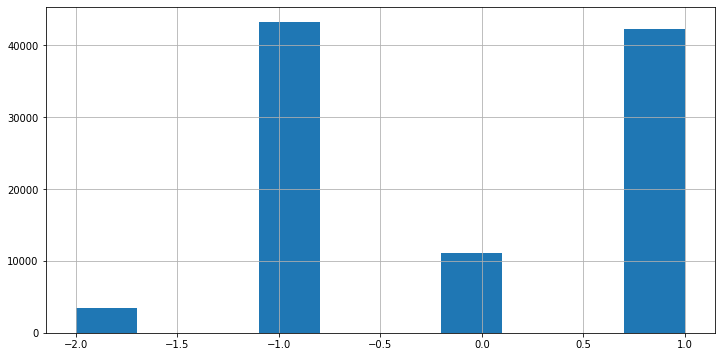

In [4]:
l.result.hist(figsize = (12,6))

In [8]:
victory_summary = l.result.value_counts()
display(victory_summary)
victory_number = victory_summary[1] - victory_summary[-1]
display(victory_number)
display(victory_number / victory_summary.sum())
1 + victory_number / victory_summary.sum()

-1    43216
 1    42246
 0    11074
-2     3464
Name: result, dtype: int64

-970

-0.0097

0.9903

### Initial card analysis

In [9]:
l['player_initial_card'] = l.player_draw.apply(lambda x: x[0])
l['opponent_initial_card'] = l.opponent_draw.apply(lambda x: x[0])

In [11]:
initial = l.groupby(['player_initial_card', 'opponent_initial_card', 'result']).size().reset_index(name='total')
initial['percentages'] = initial.groupby(['player_initial_card', 'opponent_initial_card']).total.transform(lambda x: x / x.sum())
weighted = initial[initial.result.isin([-1, 0, 1])].copy()
weighted['weights'] = weighted['result'] * weighted['total'] * weighted['percentages']
display(initial.head())
display(weighted.head())

,player_initial_card,opponent_initial_card,result,total,percentages
0,1,1,-2,28,0.035220
1,1,1,-1,388,0.488050
2,1,1,0,77,0.096855
3,1,1,1,302,0.379874
4,1,2,-2,21,0.020854


,player_initial_card,opponent_initial_card,result,total,percentages,weights
1,1,1,-1,388,0.488050,-189.363522
2,1,1,0,77,0.096855,0.000000
3,1,1,1,302,0.379874,114.722013
5,1,2,-1,437,0.433962,-189.641509
6,1,2,0,77,0.076465,0.000000


In [12]:
# For each result I want to take the top percentages
ordered = initial.sort_values(['percentages'], ascending=False).groupby('result').head(10)
ordered.sort_values(['result', 'percentages'], ascending = False)

,player_initial_card,opponent_initial_card,result,total,percentages
245,mad,6,1,245,1.000000
190,7,6,1,790,1.000000
244,mad,5,1,287,1.000000
189,7,5,1,796,1.000000
166,6,5,1,1109,1.000000
237,mad,2,1,224,0.864865
243,mad,4,1,216,0.821293
188,7,4,1,630,0.818182
185,7,3,1,610,0.812250
240,mad,3,1,183,0.806167


In [10]:
display(weighted.sort_values('weights').head(10))
display(weighted.sort_values('weights').tail(10))

,player_initial_card,opponent_initial_card,result,total,percentages,weights
111,4,fig,-1,2174,0.699936,-1521.660013
137,5,fig,-1,2009,0.644530,-1294.860764
86,3,fig,-1,1876,0.628897,-1179.810929
214,fig,fig,-1,3117,0.366749,-1143.156724
57,2,fig,-1,1684,0.550867,-927.659797
26,1,fig,-1,1459,0.465094,-678.572203
159,6,7,-1,671,0.897059,-601.926471
135,5,7,-1,655,0.815691,-534.277709
132,5,6,-1,729,0.723932,-527.746773
161,6,fig,-1,1252,0.405835,-508.105024


,player_initial_card,opponent_initial_card,result,total,percentages,weights
203,fig,4,1,1335,0.440740,588.387257
195,fig,2,1,1445,0.465979,673.339245
206,fig,5,1,1465,0.482384,706.692460
199,fig,3,1,1455,0.486134,707.325426
180,7,6,1,729,1.000000,729.000000
179,7,5,1,819,1.000000,819.000000
163,6,fig,1,1648,0.534198,880.357861
216,fig,fig,1,2796,0.328980,919.827744
155,6,5,1,1086,1.000000,1086.000000
185,7,fig,1,1735,0.755004,1309.932550


## Backup

In [88]:
initial.sort_values(['percentages'], ascending = False)

,player_initial_card,opponent_initial_card,result,total,percentages
164,7,6,1,521,1.000000
163,7,5,1,551,1.000000
217,mad,6,1,166,1.000000
216,mad,5,1,181,1.000000
141,6,5,1,707,1.000000
212,mad,3,1,168,0.898396
215,mad,4,1,142,0.876543
223,mad,fig,1,465,0.843920
209,mad,2,1,149,0.841808
162,7,4,1,481,0.830743


In [89]:
initial.sort_values(['percentages'], ascending = True)

,player_initial_card,opponent_initial_card,result,total,percentages
182,fig,3,0,23,0.010824
186,fig,4,0,27,0.012414
210,mad,3,-1,3,0.016043
178,fig,2,0,39,0.018293
174,fig,1,0,45,0.020853
26,1,fig,0,56,0.025688
80,3,fig,0,55,0.026178
55,2,fig,0,58,0.027778
207,mad,2,-1,5,0.028249
10,1,3,0,21,0.030043
